In [1]:
import torch

In [4]:
print(torch.__version__)

2.8.0+cu126


### Vector Matrix and Tensor

In [6]:
# Create tensor from python list
a = torch.tensor([1, 2, 3])
print(a)

tensor([1, 2, 3])


In [7]:
# Simply specify the shape as a tuple

b = torch.ones((2, 2)) # 2D
c = torch.zeros((3, 3, 3,)) # 3D CUBE

print(b)
print()
print(c)

tensor([[1., 1.],
        [1., 1.]])

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])


### Visualisieren

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# Alle Indizes des Tensors bestimmen (x,y,z)
x, y, z = torch.nonzero(torch.ones_like(c), as_tuple=True)

In [12]:
print(x)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2])


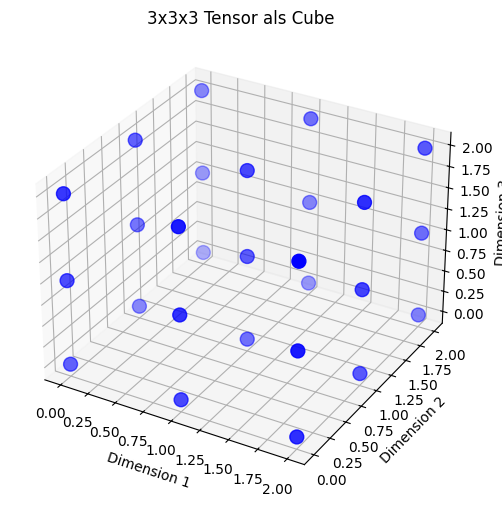

In [11]:
# Plot vorbereiten
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Punkte zeichnen (jedes Element im Tensor ist ein "Voxel" im Cube)
ax.scatter(x, y, z, c='blue', s=100)

# Achsen-Beschriftung
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('3x3x3 Tensor als Cube')

plt.show()

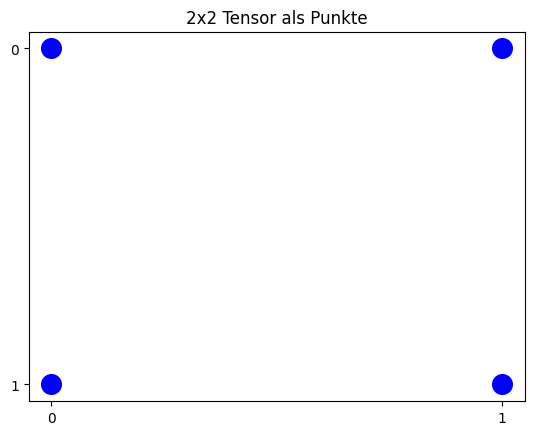

In [13]:
# Alle Werte als Punkte mit Koordinaten

x, y = torch.nonzero(b, as_tuple=True)

plt.scatter(x, y, c="blue", s=200)
plt.gca().invert_yaxis()  # sorgt dafür, dass es wie eine Matrix aussieht
plt.xticks([0,1])
plt.yticks([0,1])
plt.title("2x2 Tensor als Punkte")
plt.show()

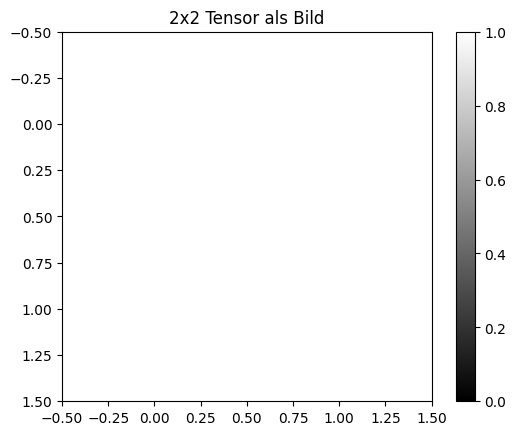

In [16]:
# als Bildmatrix (imshow)

plt.imshow(b, cmap="gray", vmin=0, vmax=1)
plt.colorbar()
plt.title("2x2 Tensor als Bild")
plt.show()

### Back to tensor

In [17]:
# Simply specify the range [low, high]

d = torch.randint(low=0, high=5, size=(2,2))
print(d)

tensor([[1, 2],
        [3, 1]])


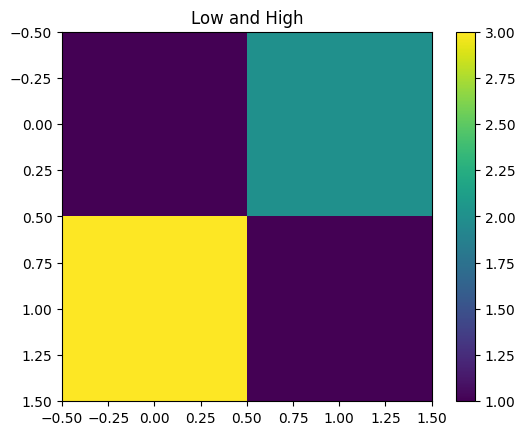

In [19]:
plt.imshow(d)
plt.colorbar()
plt.title("Low and High")
plt.show()

### Reshaping

In [20]:
a = torch.ones((3,2))

a = torch.reshape(a, (1,6))

print(a)

tensor([[1., 1., 1., 1., 1., 1.]])


In [21]:
a = torch.randint(low=0, high=3, size=(2,3))
print(a)

row_sums = torch.sum(a, dim=1) # Dim is the dimension to sum across
print(row_sums)

tensor([[1, 1, 1],
        [0, 2, 2]])
tensor([3, 4])


In [22]:
col_sums = torch.sum(a, dim=0) # Dim is the dimension to sum across
print(col_sums)

tensor([1, 3, 3])


In [24]:
a = torch.ones((2,3))
b = torch.ones((2,5))

# combine them side by side to make a 2 by 8 tensor

c = torch.cat((a,b), dim=1)
print(c)

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])


### MSE

In [30]:
a = torch.randint(low=0, high=3, size=(2,3),
                 dtype=torch.float) # Must use float because of averaging

b = torch.randint(low=0, high=3, size=(2,3),
                 dtype=torch.float) # Must use float because of averaging

print(a)
print(b)

avg_error = torch.nn.functional.mse_loss(a, b)
print(avg_error)

tensor([[1., 2., 0.],
        [1., 2., 2.]])
tensor([[2., 0., 2.],
        [1., 1., 2.]])
tensor(1.6667)


### Als RGB oder Hyperspektralebild

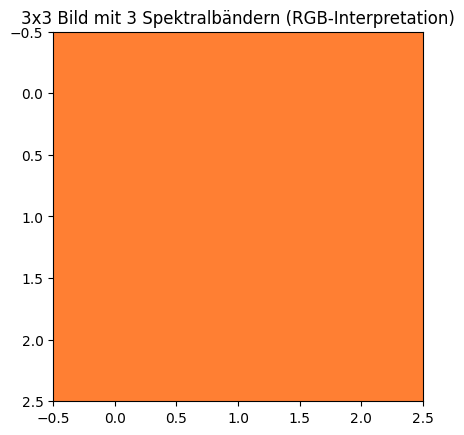

In [31]:
import torch
import matplotlib.pyplot as plt

# Mini-3x3 "Hyperspektralbild" mit 3 Bändern (RGB-Interpretation)
c = torch.zeros((3, 3, 3))

# Beispielwerte setzen, damit man die Bänder unterscheiden kann
c[:, :, 0] = 1.0  # Band 1 (Rot)
c[:, :, 1] = 0.5  # Band 2 (Grün)
c[:, :, 2] = 0.2  # Band 3 (Blau)

# Als RGB-Bild plotten (Werte zwischen 0 und 1)
plt.imshow(c.numpy())
plt.title("3x3 Bild mit 3 Spektralbändern (RGB-Interpretation)")
plt.show()